# Finding Heavy Traffic Indicators on I-94

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## The i-94 Traffic Dataset

John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

We'll use [pandas](https://pandas.pydata.org/) python library to start exploring the dataset.

We'll examine the first and the last five rows with [DataFrame.head()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html?highlight=head#pandas.DataFrame.head) and [DataFrame.tails()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html?highlight=tail#pandas.DataFrame.tail) corresponding.

We'll use [DataFrame.info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info) to find more information about the dataset.

In [1]:
import pandas as pd
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [2]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [3]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


## Analyzing Traffic Volume

The dataset documentation mentions that a station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic.

We'll going to plot a histogram to visualize the distribution of the `traffic_volume` column.

We'll use [Matplotlib]('https://matplotlib.org/stable/index.html') to make plots. When we use Matplotlib inside Jupyter, we also need to add the `%matplotlib inline magic` — this enables Jupyter to generate the graphs.

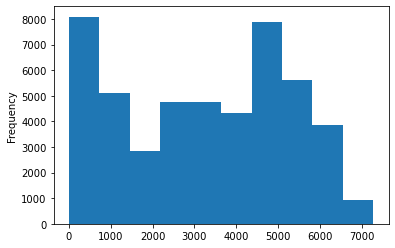

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

i94['traffic_volume'].plot.hist()
plt.show()

In [5]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

About 25% of the time the hourly traffic volume was on average 1,193 cars, maybe in the night or when the weather is worse. 

About 25% of the time, the traffic volume was on average 4,933 cars, maybe in the day in the morning or the afternoon.

# Traffic Volume: Day vs. Night

We'll exploring the possibility that `nighttime` and `daytime` might influence traffic volume.

We'll start by dividing the dataset into two parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

We'll use [pd.to_datetime]('https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html?highlight=to_datetime') function to convert `date_time` column values to Datetime dtype. 

In [6]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

We use the [Series.dt]('https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html?highlight=dt#pandas.Series.dt') function to access to hour values.

In [7]:
daytime = i94.copy()[i94['date_time'].dt.hour.between(7,18)]
daytime.shape

(23877, 9)

In [8]:
nighttime = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
nighttime.shape

(24327, 9)

We'll go to compare the traffic volume at night and during the day.

We'll use the [plt.subplot]('https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html?highlight=subplot#matplotlib.pyplot.subplot') function to plot side-by-side the histograms for  traffic volume at daty and night.


<AxesSubplot:title={'center':'Traffic Volume: Night'}, xlabel='Traffic Volume', ylabel='Frequency'>

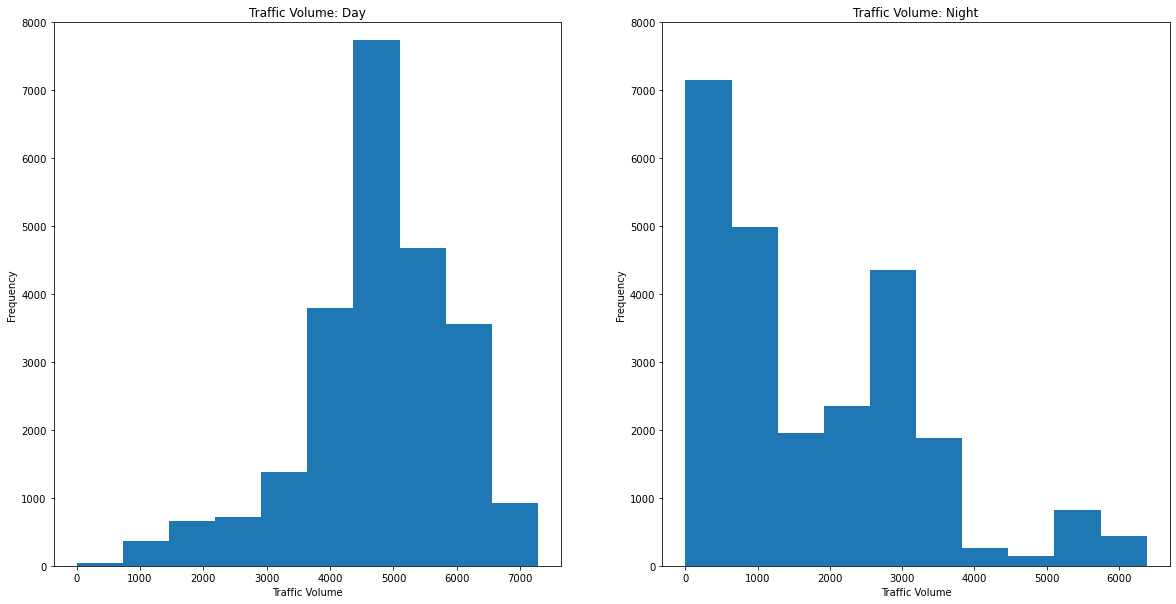

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.ylim([0, 8000])
plt.title('Traffic Volume: Day')
plt.xlabel('Traffic Volume')
daytime['traffic_volume'].plot.hist()

plt.subplot(1,2,2)
plt.ylim([0, 8000])
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
nighttime['traffic_volume'].plot.hist()

For traffic volume at day, we can see the histogram has a left-skewed distribution, this means that the traffic values for the day tend to be high.

For traffic volume at night, we can see the histogram hahs right-skewed distribution, this means that the traffic values for the night tend to be low.

In [10]:
daytime['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
nighttime['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We can also observe that most of the time during the day there is more traffic volume than at night.

Since we are looking for a range of values with high traffic, we will work with the `daytime` sub-dataset.

## Time Indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

First, we are going to generate a new month column, which will contain only the month of each record date, we are going to use the [Series.dt.month]('https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html') function to access the month of the date. 

In [12]:
daytime['month'] = daytime['date_time'].dt.month
daytime['month']

0        10
1        10
2        10
3        10
4        10
         ..
48194     9
48195     9
48196     9
48197     9
48198     9
Name: month, Length: 23877, dtype: int64


Then we are going to group the data by the new column month, with [DataFrame.groupby]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html') function.

In [13]:
by_month = daytime.groupby(by='month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

Text(0.5, 0, 'Month')

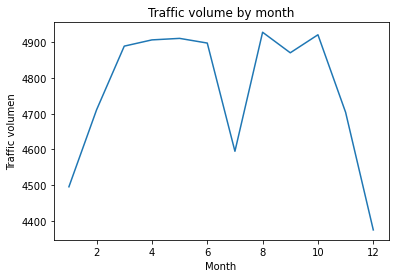

In [14]:
by_month['traffic_volume'].plot()
plt.title('Traffic volume by month')
plt.ylabel('Traffic volumen')
plt.xlabel('Month')

We can see that the average traffic volume per month remains almost the same, except the months of January, July, December, it may be because there are holidays in those months.

We'll  continue with the parameter of the day of the week. 
We are going to use the [Series.dt.dayofweek]('https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.dayofweek.html') function to access the day of week of the date. 

In [15]:
daytime['day_week'] = daytime['date_time'].dt.dayofweek
daytime['day_week'] 

0        1
1        1
2        1
3        1
4        1
        ..
48194    6
48195    6
48196    6
48197    6
48198    6
Name: day_week, Length: 23877, dtype: int64

In [16]:
day_week = daytime.groupby(by='day_week').mean()

Text(0.5, 0, 'Day of week')

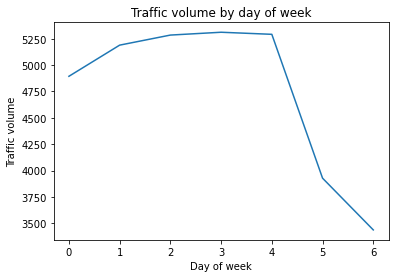

In [17]:
day_week['traffic_volume'].plot()
plt.title('Traffic volume by day of week')
plt.ylabel('Traffic volume')
plt.xlabel('Day of week')

We can see that the average traffic volume per day of the week remains almost the same, except for the weekend. 

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [18]:
daytime['hour'] = daytime['date_time'].dt.hour
daytime['hour'] 

0         9
1        10
2        11
3        12
4        13
         ..
48194    15
48195    15
48196    16
48197    17
48198    18
Name: hour, Length: 23877, dtype: int64

In [19]:
business_day = daytime[daytime['day_week'].between(0,4)] 
business_day_hour = business_day.groupby(by='hour').mean()
business_day_hour['traffic_volume']

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64

In [20]:
weekend_day = daytime[daytime['day_week'] > 4]
weekend_day_hour = weekend_day.groupby(by='hour').mean()
weekend_day_hour['traffic_volume']

hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64

<AxesSubplot:title={'center':'Traffic Volume: Weekend day'}, xlabel='hour', ylabel='Traffic Volume'>

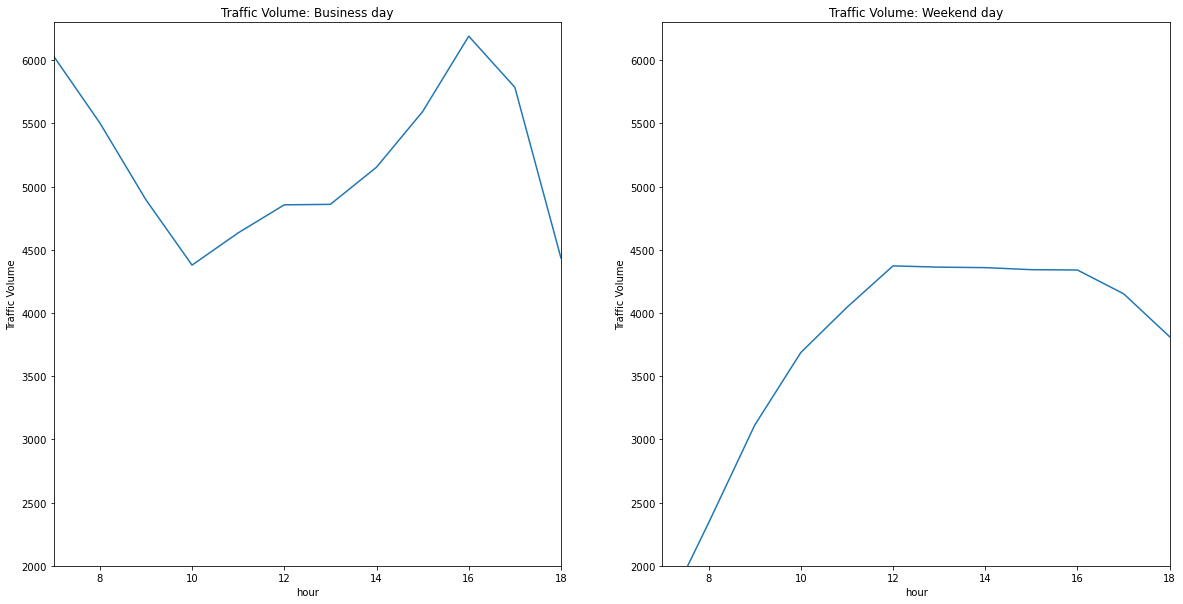

In [21]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.ylim([2000, 6300])
plt.xlim([7, 18])
plt.title('Traffic Volume: Business day')
plt.ylabel('Traffic Volume')
plt.xlabel('Hours')
business_day_hour['traffic_volume'].plot()

plt.subplot(1,2,2)
plt.ylim([2000, 6300])
plt.xlim([7, 18])
plt.title('Traffic Volume: Weekend day')
plt.ylabel('Traffic Volume')
plt.xlabel('Hours')
weekend_day_hour['traffic_volume'].plot()

For business days we have as peak hours the hours 07:00 probably when people go to work or take the children to school, and 16:00 when they leave work or return from school. We can also observe that the rest of the hours the traffic remains relatively low, it begins to increase as it approaches peak hours.

For the weekends we fear that the traffic volume begins to increase between 09:00 and 10:00 and that it increases until 18:00, which begins to decrease, probably around 12:00 until 16:00. people turn to recreational activities.

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

We'll find the correlation values between traffic_volume and the numerical weather columns. 
We'll use the [DataFrame.corr]('https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html') function to see the correlation.

In [22]:
daytime.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
day_week         -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that the strongest relationship is with the column `temp`.

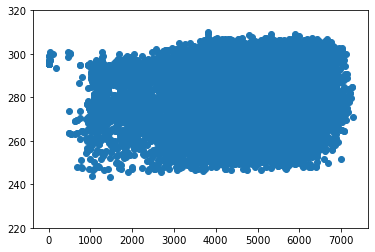

In [23]:
plt.ylim([220, 320])
plt.scatter(daytime['traffic_volume'], daytime['temp'])

We can that none of the numerical weather columns really have a strong correlation with traffic volume. 

## Weather Types

To see if we can find more useful data, we'll look next at the categorical weather-related columns: weather_main and weather_description.

In [24]:
by_weather_main = daytime.groupby('weather_main').mean()
by_weather_main['traffic_volume']

weather_main
Clear           4778.416260
Clouds          4865.415996
Drizzle         4837.212911
Fog             4372.491713
Haze            4609.893285
Mist            4623.976475
Rain            4815.568462
Smoke           4564.583333
Snow            4396.321183
Squall          4211.000000
Thunderstorm    4648.212860
Name: traffic_volume, dtype: float64

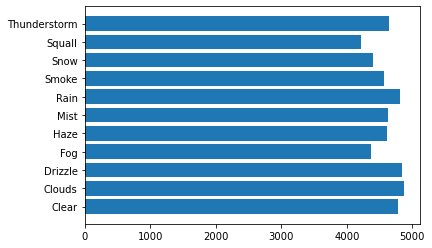

In [25]:
plt.barh(y=by_weather_main.index, width=by_weather_main['traffic_volume'])
plt.show()

We can see that no weather type pass of 5000 cars. None of the weather types seem like a heavy traffic indicator due to the fact that the volume of traffic remains more or less the same in all of them. 

In [26]:
by_weather_description = daytime.groupby('weather_description').mean()
by_weather_description['traffic_volume']

weather_description
SQUALLS                                4211.000000
Sky is Clear                           4919.009390
broken clouds                          4824.130326
drizzle                                4737.330935
few clouds                             4839.818023
fog                                    4372.491713
freezing rain                          4314.000000
haze                                   4609.893285
heavy intensity drizzle                4738.586207
heavy intensity rain                   4610.356164
heavy snow                             4411.681250
light intensity drizzle                4890.164049
light intensity shower rain            4558.100000
light rain                             4859.650849
light rain and snow                    5579.750000
light shower snow                      4618.636364
light snow                             4430.858896
mist                                   4623.976475
moderate rain                          4769.643312
overcast cl

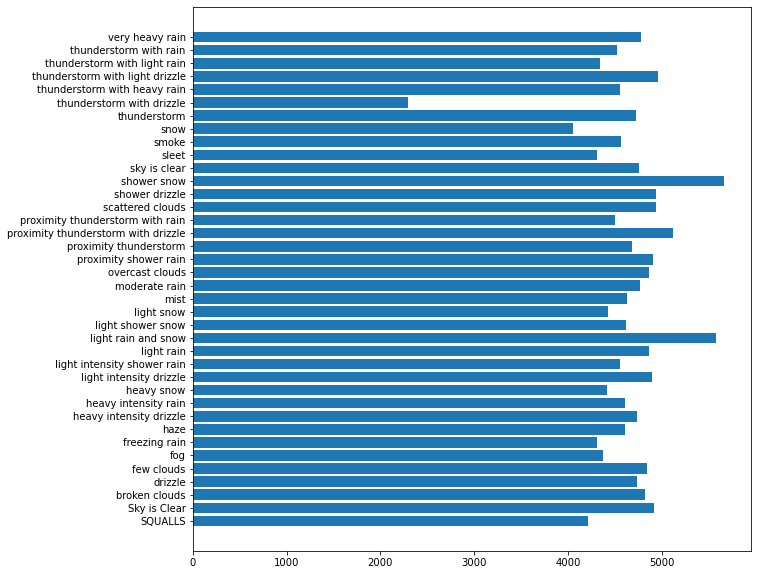

In [27]:
plt.figure(figsize=(10,10))
plt.barh(y=by_weather_description.index, width=by_weather_description['traffic_volume'])
plt.show()

We can see that the weather descriptions `light rain and snow`, `shower snow pass` and `proximity thunderstorm with drizzle`  of 5000 cars. This may be due to the relatively bad weather, motorists tend to drive with greater caution than normal, or there may be inconveniences on the road.

# Conclutions
In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

**Time indicators**
- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 7 and 16.

**Weather indicators**
- Shower snow
- Light rain and snow
- Proximity thunderstorm with drizzle

# Next Steps: Night time heavy traffic indicators

For this analysis we will perform the same techniques as in day time sub-dataset. 

*Notte: Explanations of each technique will be omitted*

## Time Indicators

We are going to start generating the helper columns where we are going to extract:

- Month
- Day of the week
- Time


In [28]:
nighttime['month'] = nighttime['date_time'].dt.month
nighttime['day_week'] = nighttime['date_time'].dt.dayofweek
nighttime['hour'] = nighttime['date_time'].dt.hour

In [29]:
nighttime_by_month = nighttime.groupby('month').mean()
nighttime_by_day_week = nighttime.groupby('day_week').mean()


nighttime_business_day = nighttime[nighttime['day_week'].between(0,4)].groupby('hour').mean()
nighttime_weekend_day = nighttime[nighttime['day_week'] > 4].groupby('hour').mean()

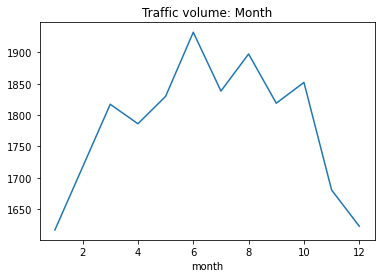

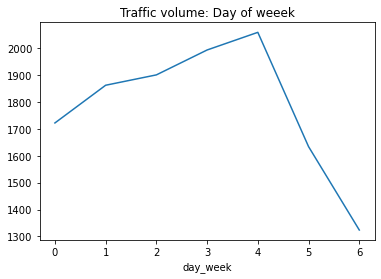

Text(0.5, 0, 'Hours')

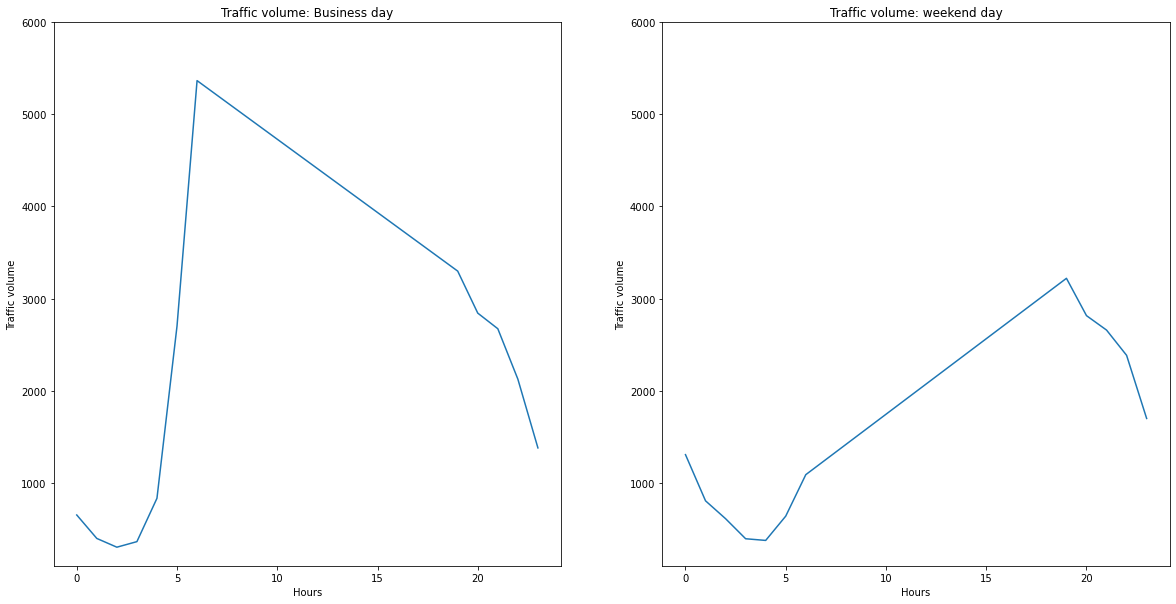

In [30]:
plt.title('Traffic volume: Month')
nighttime_by_month['traffic_volume'].plot()
plt.show()

plt.title('Traffic volume: Day of weeek')
nighttime_by_day_week['traffic_volume'].plot()
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.ylim(100, 6000)
nighttime_business_day['traffic_volume'].plot()
plt.title('Traffic volume: Business day')
plt.ylabel('Traffic volume')
plt.xlabel('Hours')

plt.subplot(1,2,2)
plt.ylim(100, 6000)
nighttime_weekend_day['traffic_volume'].plot()
plt.title('Traffic volume: weekend day')
plt.ylabel('Traffic volume')
plt.xlabel('Hours')


In [31]:
nighttime.corr()['traffic_volume']

temp              0.094004
rain_1h          -0.012972
snow_1h          -0.007453
clouds_all        0.012832
traffic_volume    1.000000
month             0.001342
day_week         -0.073636
hour              0.454586
Name: traffic_volume, dtype: float64

(200.0, 320.0)

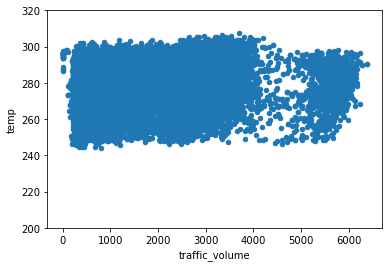

In [32]:
nighttime.plot.scatter('traffic_volume', 'temp')
plt.ylim(200, 320)

## Weather Types
Let's explore the indicators for the columns: 
- weather_main
- weather_description

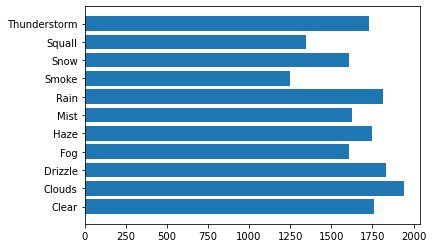

In [33]:
nighttime_by_weather_main = nighttime.groupby(by='weather_main').mean()
plt.barh(y=nighttime_by_weather_main.index, width=nighttime_by_weather_main['traffic_volume'])
plt.show()


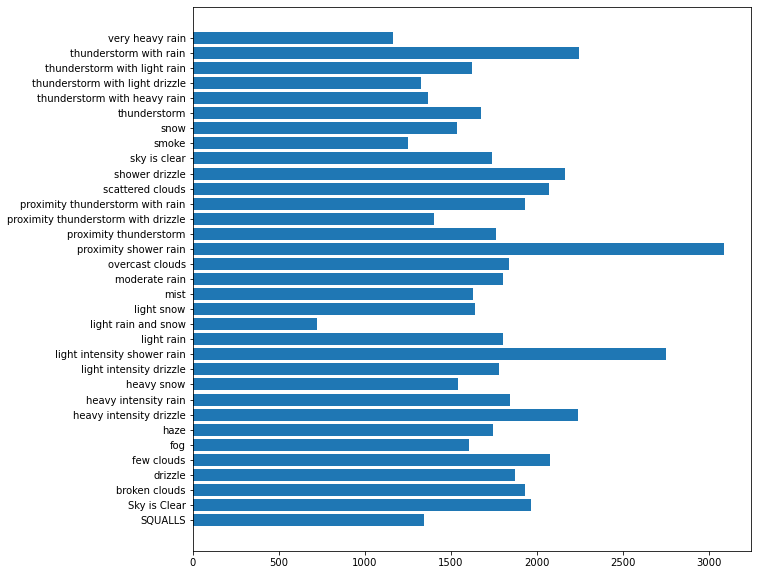

In [34]:
nighttime_by_weather_description = nighttime.groupby(by='weather_description').mean()
plt.figure(figsize=(10,10))
plt.barh(y=nighttime_by_weather_description.index, width=nighttime_by_weather_description['traffic_volume'])
plt.show()

In [35]:
nighttime_by_weather_description.index

Index(['SQUALLS', 'Sky is Clear', 'broken clouds', 'drizzle', 'few clouds',
       'fog', 'haze', 'heavy intensity drizzle', 'heavy intensity rain',
       'heavy snow', 'light intensity drizzle', 'light intensity shower rain',
       'light rain', 'light rain and snow', 'light snow', 'mist',
       'moderate rain', 'overcast clouds', 'proximity shower rain',
       'proximity thunderstorm', 'proximity thunderstorm with drizzle',
       'proximity thunderstorm with rain', 'scattered clouds',
       'shower drizzle', 'sky is clear', 'smoke', 'snow', 'thunderstorm',
       'thunderstorm with heavy rain', 'thunderstorm with light drizzle',
       'thunderstorm with light rain', 'thunderstorm with rain',
       'very heavy rain'],
      dtype='object', name='weather_description')

## Conclutions

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators

- The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
- The traffic is usually heavier on business days compared to the weekends.
- On business days, the rush hours are around 5.

Weather indicators
- Proximity shower rain
- Light intensity shower rain
